In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

%matplotlib inline

sns.set()

In [443]:
root_dir = os.getcwd()

In [444]:
# path = os.path.join(root_dir, "airline_price_data")
# csv_files = glob.glob(os.path.join(path, "*.csv"))

In [445]:
# dfs = [pd.read_csv(fp).sample(n=3000) for fp in csv_files]

In [446]:
# df_price = pd.concat(dfs)

In [447]:
# df_price = df_air_price.sort_values(["Year", "Quarter"], ascending=False)

In [448]:
# csv_file = os.path.join(root_dir, "airline_data.csv")

In [449]:
# df_price.to_csv(csv_file, index=False)

In [450]:
df_inflation = pd.read_csv("API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_4701153.csv", header = 2).copy()
df_covid = pd.read_csv("owid-covid-data.csv").copy()
df_oil = pd.read_csv("Monthly Prices-Table 1.csv", header = 4).copy()
df_price = pd.read_csv("airline_data.csv").copy()

In [451]:
df_price.head()

,ItinID,Coupons,Year,Quarter,Origin,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCountry,OriginStateFips,...,FarePerMile,RPCarrier,Passengers,ItinFare,BulkFare,Distance,DistanceGroup,MilesFlown,ItinGeoType,Unnamed: 25
0,202222093773,4,2022,2,GNV,11953,1195302,31953,US,12,...,0.1710,DL,1.0,279.0,0.0,1632.0,4,1632.0,2,NaN
1,202222157297,2,2022,2,JAX,12451,1245102,31136,US,12,...,0.2960,DL,1.0,597.0,0.0,2017.0,5,2017.0,2,NaN
2,20222179415,4,2022,2,BDL,10529,1052906,30529,US,9,...,0.1625,AA,1.0,406.0,0.0,2498.0,5,2498.0,2,NaN
3,20222577093,2,2022,2,JFK,12478,1247805,31703,US,36,...,0.4034,AA,2.0,1997.0,0.0,4950.0,10,4950.0,2,NaN
4,202222109297,2,2022,2,GSP,11996,1199603,31871,US,45,...,0.2467,DL,1.0,148.0,0.0,600.0,2,600.0,2,NaN


In [452]:
df_price.columns.to_list()

['ItinID',
 'Coupons',
 'Year',
 'Quarter',
 'Origin',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCountry',
 'OriginStateFips',
 'OriginState',
 'OriginStateName',
 'OriginWac',
 'RoundTrip',
 'OnLine',
 'DollarCred',
 'FarePerMile',
 'RPCarrier',
 'Passengers',
 'ItinFare',
 'BulkFare',
 'Distance',
 'DistanceGroup',
 'MilesFlown',
 'ItinGeoType',
 'Unnamed: 25']

In [453]:
df_price.drop(["OriginAirportID", "OriginAirportSeqID", "OriginCityMarketID", "OriginCountry", "OriginStateFips", "OriginWac", "OnLine", "RPCarrier", "Passengers", "DistanceGroup", "ItinGeoType", "Unnamed: 25"], axis = 1, inplace=True)

In [454]:
df_price

,ItinID,Coupons,Year,Quarter,Origin,OriginState,OriginStateName,RoundTrip,DollarCred,FarePerMile,ItinFare,BulkFare,Distance,MilesFlown
0,202222093773,4,2022,2,GNV,FL,Florida,1.0,1,0.1710,279.0,0.0,1632.0,1632.0
1,202222157297,2,2022,2,JAX,FL,Florida,0.0,1,0.2960,597.0,0.0,2017.0,2017.0
2,20222179415,4,2022,2,BDL,CT,Connecticut,1.0,1,0.1625,406.0,0.0,2498.0,2498.0
3,20222577093,2,2022,2,JFK,NY,New York,1.0,1,0.4034,1997.0,0.0,4950.0,4950.0
4,202222109297,2,2022,2,GSP,SC,South Carolina,0.0,1,0.2467,148.0,0.0,600.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353995,199311641314,4,1993,1,CMH,OH,Ohio,1.0,1,0.1313,331.0,0.0,2520.0,2520.0
353996,19931932590,4,1993,1,CRW,WV,West Virginia,1.0,1,0.5038,469.0,0.0,995.0,931.0
353997,199311331282,2,1993,1,LAX,CA,California,1.0,1,0.1667,283.0,0.0,1698.0,1698.0
353998,1993114896,4,1993,1,BDL,CT,Connecticut,1.0,1,0.1168,281.0,0.0,2427.0,2406.0


In [455]:
columns = df_price.columns.to_list()

In [456]:
columns

['ItinID',
 'Coupons',
 'Year',
 'Quarter',
 'Origin',
 'OriginState',
 'OriginStateName',
 'RoundTrip',
 'DollarCred',
 'FarePerMile',
 'ItinFare',
 'BulkFare',
 'Distance',
 'MilesFlown']

In [457]:
def snake_case(list):
    snake = ""
    new_list = []
    itt = 0
    
    for x in list:
        itt = 1
        for i in x:
            if itt == 1:
                i = i.lower()
                snake += i
                itt = itt + 1
            else:
                if i.isupper():
                    snake +="_"+i.lower()
                else:
                    snake += i
        new_list.append(snake)
        snake = ""
        itt = 0
        
    return new_list

In [458]:
columns = snake_case(columns)

In [459]:
df_price = df_price

In [460]:
df_price.columns = columns
df_price.rename(columns={"itin_i_d":"itin_id"}, inplace=True)

In [461]:
df_price.head()

,itin_id,coupons,year,quarter,origin,origin_state,origin_state_name,round_trip,dollar_cred,fare_per_mile,itin_fare,bulk_fare,distance,miles_flown
0,202222093773,4,2022,2,GNV,FL,Florida,1.0,1,0.1710,279.0,0.0,1632.0,1632.0
1,202222157297,2,2022,2,JAX,FL,Florida,0.0,1,0.2960,597.0,0.0,2017.0,2017.0
2,20222179415,4,2022,2,BDL,CT,Connecticut,1.0,1,0.1625,406.0,0.0,2498.0,2498.0
3,20222577093,2,2022,2,JFK,NY,New York,1.0,1,0.4034,1997.0,0.0,4950.0,4950.0
4,202222109297,2,2022,2,GSP,SC,South Carolina,0.0,1,0.2467,148.0,0.0,600.0,600.0


In [462]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354000 entries, 0 to 353999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   itin_id            354000 non-null  int64  
 1   coupons            354000 non-null  int64  
 2   year               354000 non-null  int64  
 3   quarter            354000 non-null  int64  
 4   origin             354000 non-null  object 
 5   origin_state       354000 non-null  object 
 6   origin_state_name  354000 non-null  object 
 7   round_trip         354000 non-null  float64
 8   dollar_cred        354000 non-null  int64  
 9   fare_per_mile      354000 non-null  float64
 10  itin_fare          354000 non-null  float64
 11  bulk_fare          354000 non-null  float64
 12  distance           354000 non-null  float64
 13  miles_flown        354000 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 37.8+ MB


In [463]:
df_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN,NaN


In [464]:
df_inflation = df_inflation.loc[df_inflation["Country Name"] == "United States"].copy()

In [465]:
df_inflation.drop(df_inflation.iloc[:,:37], axis=1, inplace=True)

In [466]:
df_inflation.drop(["Unnamed: 66"], axis = 1, inplace=True)

In [467]:
df_inflation

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
251,2.951657,2.607442,2.80542,2.931204,2.33769,1.552279,2.188027,3.376857,2.826171,1.586032,...,2.069337,1.464833,1.622223,0.118627,1.261583,2.13011,2.442583,1.81221,1.233584,4.697859


In [468]:
inflation_columns = df_inflation.columns.to_list()

In [469]:
df_inflation = df_inflation.transpose()

In [470]:
df_inflation.reset_index(inplace=True)
df_inflation.rename(columns={"index": "year", 251: "inflation_rate"}, inplace=True)

In [471]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            29 non-null     object 
 1   inflation_rate  29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


In [472]:
df_inflation.head()

,year,inflation_rate
0,1993,2.951657
1,1994,2.607442
2,1995,2.805420
3,1996,2.931204
4,1997,2.337690


In [473]:
df_inflation["year"] = df_inflation["year"].astype(int)

In [474]:
df_oil.head()

,Unnamed: 0,"Crude oil, average","Crude oil, Brent","Crude oil, Dubai","Crude oil, WTI","Coal, Australian **","Coal, South African **","Natural gas, US","Natural gas, Europe **","Liquefied natural gas, Japan",...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
0,NaN,($/bbl),($/bbl),($/bbl),($/bbl),($/mt),($/mt),($/mmbtu),($/mmbtu),($/mmbtu),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.40,…,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.40,…,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.40,…,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.40,…,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
df_oil.drop(df_oil.iloc[:,2:], axis=1, inplace=True)

In [476]:
df_oil.rename(columns={"Unnamed: 0": "date", "Crude oil, average": "price_per_barrel"}, inplace=True)

In [477]:
df_oil.drop([0], inplace=True)

In [478]:
df_oil[["year", "quarter"]] = df_oil["date"].str.split("M", expand=True)

In [479]:
df_oil.drop(["date"], axis=1, inplace=True)

In [480]:
df_oil = df_oil.loc[:,["year", "quarter", "price_per_barrel"]]

In [481]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 1 to 754
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              754 non-null    object
 1   quarter           754 non-null    object
 2   price_per_barrel  754 non-null    object
dtypes: object(3)
memory usage: 17.8+ KB


In [482]:
df_oil["quarter"] = df_oil["quarter"].astype(int)

In [483]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 1 to 754
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              754 non-null    object
 1   quarter           754 non-null    int64 
 2   price_per_barrel  754 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.8+ KB


In [484]:
df_oil

,year,quarter,price_per_barrel
1,1960,1,1.63
2,1960,2,1.63
3,1960,3,1.63
4,1960,4,1.63
5,1960,5,1.63
...,...,...,...
750,2022,6,116.80
751,2022,7,105.08
752,2022,8,95.97
753,2022,9,88.22


In [485]:
def quarterer(list):
    
    new_list = []
    
    for x in list:
        if x == 1 or x== 2 or x == 3:
            new_list.append("1")
        elif x == 4 or x== 5 or x== 6:
            new_list.append("2")
        elif x == 7 or x== 8 or x== 9:
            new_list.append("3")
        else:
            new_list.append("4")
    return new_list

In [486]:
quarters = df_oil["quarter"].to_list()

In [487]:
new_quarter = quarterer(quarters)

In [488]:
df_oil["quarter"] = new_quarter

In [489]:
df_oil

,year,quarter,price_per_barrel
1,1960,1,1.63
2,1960,1,1.63
3,1960,1,1.63
4,1960,2,1.63
5,1960,2,1.63
...,...,...,...
750,2022,2,116.80
751,2022,3,105.08
752,2022,3,95.97
753,2022,3,88.22


In [490]:
df_oil = df_oil.loc[df_oil["year"] >= "1993"].copy()

In [491]:
df_oil.reset_index(inplace=True)
df_oil.drop(["index"], axis=1, inplace=True)

In [492]:
df_oil

,year,quarter,price_per_barrel
0,1993,1,17.22
1,1993,1,18.17
2,1993,1,18.47
3,1993,2,18.43
4,1993,2,18.17
...,...,...,...
353,2022,2,116.80
354,2022,3,105.08
355,2022,3,95.97
356,2022,3,88.22


In [493]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              358 non-null    object
 1   quarter           358 non-null    object
 2   price_per_barrel  358 non-null    object
dtypes: object(3)
memory usage: 8.5+ KB


In [494]:
df_oil["year"] = df_oil["year"].astype(int)
df_oil["price_per_barrel"] = df_oil["price_per_barrel"].astype(float)

In [495]:
df_oil

,year,quarter,price_per_barrel
0,1993,1,17.22
1,1993,1,18.17
2,1993,1,18.47
3,1993,2,18.43
4,1993,2,18.17
...,...,...,...
353,2022,2,116.80
354,2022,3,105.08
355,2022,3,95.97
356,2022,3,88.22


In [496]:
df_oil

,year,quarter,price_per_barrel
0,1993,1,17.22
1,1993,1,18.17
2,1993,1,18.47
3,1993,2,18.43
4,1993,2,18.17
...,...,...,...
353,2022,2,116.80
354,2022,3,105.08
355,2022,3,95.97
356,2022,3,88.22


In [497]:
def average_price_per_quarter(df):
    years = df['year'].unique()
    quarters = df['quarter'].unique()
    year = []
    quarter = []
    price_per_barrel = []
    
    for y in years:
        for q in quarters:
            year.append(y)
            quarter.append(q)
            this_df = df.loc[(df['year']==y) & (df['quarter']==q)]
            total = this_df['price_per_barrel'].sum()
            avg = total / len(this_df)
            price_per_barrel.append(avg)
            
    oil_dic = {"year": year, "quarter": quarter, "price_per_barrel": price_per_barrel}        
    new_df = pd.DataFrame(oil_dic)
    return new_df

In [498]:
df_oil = average_price_per_quarter(df_oil)

In [499]:
df_oil = df_oil.iloc[:118]

In [500]:
df_oil

,year,quarter,price_per_barrel
0,1993,1,17.953333
1,1993,2,18.023333
2,1993,3,16.233333
3,1993,4,15.163333
4,1994,1,13.843333
...,...,...,...
113,2021,2,67.050000
114,2021,3,71.650000
115,2021,4,78.283333
116,2022,1,96.620000


In [501]:
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [502]:
df_covid = df_covid.loc[df_covid["location"] == "United States"]

In [503]:
df_covid.columns.unique()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [504]:
df_covid = df_covid[["date", "total_cases", "total_deaths", "total_tests_per_thousand","total_vaccinations"]].copy()

In [505]:
df_covid["date"] = pd.to_datetime(df_covid["date"], yearfirst=True)

In [506]:
df_covid = df_covid.fillna(0).copy()

In [507]:
df_covid.loc[(df_covid["date"].dt.month == 6) & (df_covid["date"].dt.day == 18) & (df_covid["date"].dt.year == 2022)]

,date,total_cases,total_deaths,total_tests_per_thousand,total_vaccinations
221439,2022-06-18,86346984.0,1013818.0,2708.533,596397411.0


In [508]:
final_value = df_covid.at[221439, "total_tests_per_thousand"]

In [509]:
quarter_one = df_covid.loc[(df_covid["date"].dt.month == 3) & (df_covid["date"].dt.day == 31)]
quarter_two = df_covid.loc[(df_covid["date"].dt.month == 6) & (df_covid["date"].dt.day == 30)]
quarter_three = df_covid.loc[(df_covid["date"].dt.month == 9) & (df_covid["date"].dt.day == 30)]
quarter_four = df_covid.loc[(df_covid["date"].dt.month == 12) & (df_covid["date"].dt.day == 31)]

In [510]:
df_covid = pd.concat([quarter_one, quarter_two, quarter_three, quarter_four])

In [511]:
df_covid.sort_values(["date"])

,date,total_cases,total_deaths,total_tests_per_thousand,total_vaccinations
220630,2020-03-31,192079.0,5359.0,4.551,0.0
220721,2020-06-30,2648650.0,127418.0,110.875,0.0
220813,2020-09-30,7246179.0,205940.0,353.421,0.0
220905,2020-12-31,20217256.0,350555.0,765.271,5702507.0
220995,2021-03-31,30577380.0,548380.0,1144.915,172353256.0
221086,2021-06-30,33780270.0,600788.0,1400.983,339220705.0
221178,2021-09-30,43537302.0,696943.0,1737.996,402857453.0
221270,2021-12-31,54904598.0,825614.0,2155.384,521096658.0
221360,2022-03-31,80238708.0,983294.0,2534.142,567440878.0
221451,2022-06-30,87692690.0,1017601.0,0.000,599160144.0


In [512]:
df_covid["year"] = df_covid["date"].dt.year
df_covid["quarter"] = df_covid["date"].dt.month

In [513]:
df_covid["quarter"] = quarterer(df_covid["quarter"].to_list())

In [514]:
df_covid.drop(["date"], axis=1, inplace=True)

In [515]:
df_covid = df_covid.fillna(0).copy()

In [516]:
df_covid["total_cases"] = df_covid["total_cases"].astype(int)
df_covid["total_deaths"] = df_covid["total_deaths"].astype(int)
df_covid["total_vaccinations"] = df_covid["total_vaccinations"].astype(int)

In [517]:
df_covid.loc[df_covid["total_tests_per_thousand"] >=1]

,total_cases,total_deaths,total_tests_per_thousand,total_vaccinations,year,quarter
220630,192079,5359,4.551,0,2020,1
220995,30577380,548380,1144.915,172353256,2021,1
221360,80238708,983294,2534.142,567440878,2022,1
220721,2648650,127418,110.875,0,2020,2
221086,33780270,600788,1400.983,339220705,2021,2
220813,7246179,205940,353.421,0,2020,3
221178,43537302,696943,1737.996,402857453,2021,3
220905,20217256,350555,765.271,5702507,2020,4
221270,54904598,825614,2155.384,521096658,2021,4


In [518]:
df_covid = df_covid.iloc[:878]

In [519]:
df_covid.loc[(df_covid["year"] == 2020) & (df_covid["quarter"] == "Q1")]

,total_cases,total_deaths,total_tests_per_thousand,total_vaccinations,year,quarter


In [520]:
df_covid.sort_values(["year", "quarter"], inplace=True)

In [521]:
df_covid.reset_index(inplace=True)

In [522]:
df_covid.drop(["index"], axis=1, inplace=True)

In [523]:
df_covid = df_covid.loc[:,["year", "quarter", "total_cases", "total_deaths", "total_tests_per_thousand", "total_vaccinations"]]

In [524]:
df_covid

,year,quarter,total_cases,total_deaths,total_tests_per_thousand,total_vaccinations
0,2020,1,192079,5359,4.551,0
1,2020,2,2648650,127418,110.875,0
2,2020,3,7246179,205940,353.421,0
3,2020,4,20217256,350555,765.271,5702507
4,2021,1,30577380,548380,1144.915,172353256
5,2021,2,33780270,600788,1400.983,339220705
6,2021,3,43537302,696943,1737.996,402857453
7,2021,4,54904598,825614,2155.384,521096658
8,2022,1,80238708,983294,2534.142,567440878
9,2022,2,87692690,1017601,0.000,599160144


In [525]:
df_covid = df_covid.iloc[:10]

In [526]:
df_covid.at[9, "total_tests_per_thousand"] = final_value

In [527]:
df_covid = df_covid.copy()

In [528]:
df_covid["quarter"] = df_covid["quarter"].astype(int)

In [545]:
def create_tup_dict(df, column):
    year = df["year"].to_list()
    quarter = df["quarter"].to_list()
    col = column.to_list()
    y_q_tup_list = []
    new_dict = {}
    
    for x, y in zip(year, quarter):
        y_q_tup = (x, y)
        y_q_tup_list.append(y_q_tup)
        
        new_dict = {y_q_tup_list[i]: col[i] for i in range(len(y_q_tup_list))}
    return new_dict

In [546]:
total_cases = create_tup_dict(df_covid, df_covid["total_cases"])
total_deaths = create_tup_dict(df_covid, df_covid["total_deaths"])
total_tests_per_thousand = create_tup_dict(df_covid, df_covid["total_tests_per_thousand"])
total_vaccinations = create_tup_dict(df_covid, df_covid["total_vaccinations"])

In [552]:
def covider(row, dic, name):
    if any(row["year"] in x for x in dic.keys()):
        row[name] = dic[row["year"], row["quarter"]]
    return row

In [559]:
df_price = df_price.apply(covider, axis = 1, args = (total_cases, "total_covid_cases"))
df_price = df_price.apply(covider, axis = 1, args = (total_deaths, "total_covid_deaths"))
df_price = df_price.apply(covider, axis = 1, args = (total_tests_per_thousand, "total_covid_tests_per_thousand"))
df_price = df_price.apply(covider, axis = 1, args = (total_vaccinations, "total_covid_vaccinations"))

In [564]:
df_price.fillna(0, inplace=True)

In [565]:
df_covid

,year,quarter,total_cases,total_deaths,total_tests_per_thousand,total_vaccinations
0,2020,1,192079,5359,4.551,0
1,2020,2,2648650,127418,110.875,0
2,2020,3,7246179,205940,353.421,0
3,2020,4,20217256,350555,765.271,5702507
4,2021,1,30577380,548380,1144.915,172353256
5,2021,2,33780270,600788,1400.983,339220705
6,2021,3,43537302,696943,1737.996,402857453
7,2021,4,54904598,825614,2155.384,521096658
8,2022,1,80238708,983294,2534.142,567440878
9,2022,2,87692690,1017601,2708.533,599160144


In [566]:
df_inflation

,year,inflation_rate
0,1993,2.951657
1,1994,2.607442
2,1995,2.805420
3,1996,2.931204
4,1997,2.337690
5,1998,1.552279
6,1999,2.188027
7,2000,3.376857
8,2001,2.826171
9,2002,1.586032


In [567]:
df_inflation.loc[len(df_inflation.index)] = [2022, 8.2529]

In [568]:
df_inflation.tail()

,year,inflation_rate
25,2018.0,2.442583
26,2019.0,1.812210
27,2020.0,1.233584
28,2021.0,4.697859
29,2022.0,8.252900


In [569]:
df_inflation["year"] = df_inflation["year"].astype(int)

In [570]:
df_inflation.sort_values(["year"], inplace=True, ascending=False)

In [571]:
df_inflation.head()

,year,inflation_rate
29,2022,8.252900
28,2021,4.697859
27,2020,1.233584
26,2019,1.812210
25,2018,2.442583


In [572]:
df_inflation["cumulative_inflation"] =np.cumsum(df_inflation["inflation_rate"])

In [573]:
df_inflation

,year,inflation_rate,cumulative_inflation
29,2022,8.252900,8.252900
28,2021,4.697859,12.950759
27,2020,1.233584,14.184343
26,2019,1.812210,15.996553
25,2018,2.442583,18.439137
24,2017,2.130110,20.569247
23,2016,1.261583,21.830830
22,2015,0.118627,21.949457
21,2014,1.622223,23.571680
20,2013,1.464833,25.036513


In [574]:
df_oil

,year,quarter,price_per_barrel
0,1993,1,17.953333
1,1993,2,18.023333
2,1993,3,16.233333
3,1993,4,15.163333
4,1994,1,13.843333
...,...,...,...
113,2021,2,67.050000
114,2021,3,71.650000
115,2021,4,78.283333
116,2022,1,96.620000


In [575]:
df_oil["quarter"] = df_oil["quarter"].astype(int)

In [584]:
def create_tup_dict(df, column):
    year = df["year"].to_list()
    quarter = df["quarter"].to_list()
    col = column.to_list()
    y_q_tup_list = []
    new_dict = {}
    
    for x, y in zip(year, quarter):
        y_q_tup = (x, y)
        y_q_tup_list.append(y_q_tup)
        
        new_dict = {y_q_tup_list[i]: col[i] for i in range(len(y_q_tup_list))}
    return new_dict

In [585]:
oil_dict = create_tup_dict(df_oil, df_oil["price_per_barrel"])

In [586]:
def oiler(row):
    row["oil_price_per_barrel"] = oil_dict[row["year"], row["quarter"]]
    return row

In [588]:
oil_dict.keys()

dict_keys([(1993, 1), (1993, 2), (1993, 3), (1993, 4), (1994, 1), (1994, 2), (1994, 3), (1994, 4), (1995, 1), (1995, 2), (1995, 3), (1995, 4), (1996, 1), (1996, 2), (1996, 3), (1996, 4), (1997, 1), (1997, 2), (1997, 3), (1997, 4), (1998, 1), (1998, 2), (1998, 3), (1998, 4), (1999, 1), (1999, 2), (1999, 3), (1999, 4), (2000, 1), (2000, 2), (2000, 3), (2000, 4), (2001, 1), (2001, 2), (2001, 3), (2001, 4), (2002, 1), (2002, 2), (2002, 3), (2002, 4), (2003, 1), (2003, 2), (2003, 3), (2003, 4), (2004, 1), (2004, 2), (2004, 3), (2004, 4), (2005, 1), (2005, 2), (2005, 3), (2005, 4), (2006, 1), (2006, 2), (2006, 3), (2006, 4), (2007, 1), (2007, 2), (2007, 3), (2007, 4), (2008, 1), (2008, 2), (2008, 3), (2008, 4), (2009, 1), (2009, 2), (2009, 3), (2009, 4), (2010, 1), (2010, 2), (2010, 3), (2010, 4), (2011, 1), (2011, 2), (2011, 3), (2011, 4), (2012, 1), (2012, 2), (2012, 3), (2012, 4), (2013, 1), (2013, 2), (2013, 3), (2013, 4), (2014, 1), (2014, 2), (2014, 3), (2014, 4), (2015, 1), (2015, 2),

In [589]:
df_price = df_price.apply(oiler, axis=1)

In [590]:
df_price.loc[df_price["year"] == 2022]

,bulk_fare,coupons,distance,dollar_cred,fare_per_mile,itin_fare,itin_id,miles_flown,origin,origin_state,origin_state_name,quarter,round_trip,total_covid_cases,total_covid_deaths,total_covid_tests_per_thousand,total_covid_vaccinations,year,oil_price_per_barrel
0,0.0,4,1632.0,1,0.1710,279.0,202222093773,1632.0,GNV,FL,Florida,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
1,0.0,2,2017.0,1,0.2960,597.0,202222157297,2017.0,JAX,FL,Florida,2,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
2,0.0,4,2498.0,1,0.1625,406.0,20222179415,2498.0,BDL,CT,Connecticut,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
3,0.0,2,4950.0,1,0.4034,1997.0,20222577093,4950.0,JFK,NY,New York,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
4,0.0,2,600.0,1,0.2467,148.0,202222109297,600.0,GSP,SC,South Carolina,2,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.0,3,1726.0,1,0.3221,556.0,20221262044,1726.0,DCA,VA,Virginia,1,0.0,80238708.0,983294.0,2534.142,567440878.0,2022,96.620000
5996,0.0,2,1300.0,1,0.0969,126.0,202214594232,1300.0,PBI,FL,Florida,1,0.0,80238708.0,983294.0,2534.142,567440878.0,2022,96.620000
5997,0.0,3,2097.0,1,0.1769,371.0,202214267871,2097.0,ROC,NY,New York,1,1.0,80238708.0,983294.0,2534.142,567440878.0,2022,96.620000
5998,0.0,4,2862.0,1,0.1129,323.0,202213700344,2862.0,AUS,TX,Texas,1,1.0,80238708.0,983294.0,2534.142,567440878.0,2022,96.620000


In [591]:
df_price

,bulk_fare,coupons,distance,dollar_cred,fare_per_mile,itin_fare,itin_id,miles_flown,origin,origin_state,origin_state_name,quarter,round_trip,total_covid_cases,total_covid_deaths,total_covid_tests_per_thousand,total_covid_vaccinations,year,oil_price_per_barrel
0,0.0,4,1632.0,1,0.1710,279.0,202222093773,1632.0,GNV,FL,Florida,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
1,0.0,2,2017.0,1,0.2960,597.0,202222157297,2017.0,JAX,FL,Florida,2,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
2,0.0,4,2498.0,1,0.1625,406.0,20222179415,2498.0,BDL,CT,Connecticut,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
3,0.0,2,4950.0,1,0.4034,1997.0,20222577093,4950.0,JFK,NY,New York,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
4,0.0,2,600.0,1,0.2467,148.0,202222109297,600.0,GSP,SC,South Carolina,2,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353995,0.0,4,2520.0,1,0.1313,331.0,199311641314,2520.0,CMH,OH,Ohio,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333
353996,0.0,4,995.0,1,0.5038,469.0,19931932590,931.0,CRW,WV,West Virginia,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333
353997,0.0,2,1698.0,1,0.1667,283.0,199311331282,1698.0,LAX,CA,California,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333
353998,0.0,4,2427.0,1,0.1168,281.0,1993114896,2406.0,BDL,CT,Connecticut,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333


In [592]:
def create_inf_dict(df):
    inf_year = df["year"].to_list()
    inf_rate = df["cumulative_inflation"].to_list()
    inf_data = {}
    
    for x, y in zip(inf_year, inf_rate):
        inf_data.update({x: y})
        
    return inf_data

In [593]:
inf_dict = create_inf_dict(df_inflation)

In [594]:
inf_dict.keys()

dict_keys([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993])

In [595]:
def inflator(row):
    row["cumulative_inflation"] = inf_dict[row["year"]]
    return row

In [596]:
df_price = df_price.apply(inflator, axis=1)

In [597]:
df_price

,bulk_fare,coupons,distance,dollar_cred,fare_per_mile,itin_fare,itin_id,miles_flown,origin,origin_state,origin_state_name,quarter,round_trip,total_covid_cases,total_covid_deaths,total_covid_tests_per_thousand,total_covid_vaccinations,year,oil_price_per_barrel,cumulative_inflation
0,0.0,4,1632.0,1,0.1710,279.0,202222093773,1632.0,GNV,FL,Florida,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900
1,0.0,2,2017.0,1,0.2960,597.0,202222157297,2017.0,JAX,FL,Florida,2,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900
2,0.0,4,2498.0,1,0.1625,406.0,20222179415,2498.0,BDL,CT,Connecticut,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900
3,0.0,2,4950.0,1,0.4034,1997.0,20222577093,4950.0,JFK,NY,New York,2,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900
4,0.0,2,600.0,1,0.2467,148.0,202222109297,600.0,GSP,SC,South Carolina,2,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353995,0.0,4,2520.0,1,0.1313,331.0,199311641314,2520.0,CMH,OH,Ohio,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763
353996,0.0,4,995.0,1,0.5038,469.0,19931932590,931.0,CRW,WV,West Virginia,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763
353997,0.0,2,1698.0,1,0.1667,283.0,199311331282,1698.0,LAX,CA,California,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763
353998,0.0,4,2427.0,1,0.1168,281.0,1993114896,2406.0,BDL,CT,Connecticut,1,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763


In [598]:
df_price["inflation_adjusted_itin_fare"] = (df_price["itin_fare"] * (df_price["cumulative_inflation"]) * .001) + df_price["itin_fare"]

In [599]:
df_price["inflation_adjusted_fare_per_mile"] = (df_price["fare_per_mile"] * (df_price["cumulative_inflation"]) * .001) + df_price["fare_per_mile"]

In [600]:
((df_price["fare_per_mile"]) * (df_inflation["inflation_rate"]) * .001) + df_price["fare_per_mile"]

0         0.171505
1         0.296772
2         0.162956
3         0.404582
4         0.247277
            ...   
353995         NaN
353996         NaN
353997         NaN
353998         NaN
353999         NaN
Length: 354000, dtype: float64

In [601]:
df_price.head()

,bulk_fare,coupons,distance,dollar_cred,fare_per_mile,itin_fare,itin_id,miles_flown,origin,origin_state,...,round_trip,total_covid_cases,total_covid_deaths,total_covid_tests_per_thousand,total_covid_vaccinations,year,oil_price_per_barrel,cumulative_inflation,inflation_adjusted_itin_fare,inflation_adjusted_fare_per_mile
0,0.0,4,1632.0,1,0.1710,279.0,202222093773,1632.0,GNV,FL,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.2529,281.302559,0.172411
1,0.0,2,2017.0,1,0.2960,597.0,202222157297,2017.0,JAX,FL,...,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.2529,601.926981,0.298443
2,0.0,4,2498.0,1,0.1625,406.0,20222179415,2498.0,BDL,CT,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.2529,409.350677,0.163841
3,0.0,2,4950.0,1,0.4034,1997.0,20222577093,4950.0,JFK,NY,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.2529,2013.481041,0.406729
4,0.0,2,600.0,1,0.2467,148.0,202222109297,600.0,GSP,SC,...,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.2529,149.221429,0.248736


In [603]:
df_price.isna().sum()

bulk_fare                           0
coupons                             0
distance                            0
dollar_cred                         0
fare_per_mile                       0
itin_fare                           0
itin_id                             0
miles_flown                         0
origin                              0
origin_state                        0
origin_state_name                   0
quarter                             0
round_trip                          0
total_covid_cases                   0
total_covid_deaths                  0
total_covid_tests_per_thousand      0
total_covid_vaccinations            0
year                                0
oil_price_per_barrel                0
cumulative_inflation                0
inflation_adjusted_itin_fare        0
inflation_adjusted_fare_per_mile    0
dtype: int64

In [604]:
csv_file = os.path.join(root_dir, "airline_data_final.csv")

In [605]:
df_price.to_csv(csv_file, index=False)

In [614]:
df = pd.read_csv("airline_data_final.csv")

In [607]:
df

,bulk_fare,coupons,distance,dollar_cred,fare_per_mile,itin_fare,itin_id,miles_flown,origin,origin_state,...,round_trip,total_covid_cases,total_covid_deaths,total_covid_tests_per_thousand,total_covid_vaccinations,year,oil_price_per_barrel,cumulative_inflation,inflation_adjusted_itin_fare,inflation_adjusted_fare_per_mile
0,0.0,4,1632.0,1,0.1710,279.0,202222093773,1632.0,GNV,FL,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,281.302559,0.172411
1,0.0,2,2017.0,1,0.2960,597.0,202222157297,2017.0,JAX,FL,...,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,601.926981,0.298443
2,0.0,4,2498.0,1,0.1625,406.0,20222179415,2498.0,BDL,CT,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,409.350677,0.163841
3,0.0,2,4950.0,1,0.4034,1997.0,20222577093,4950.0,JFK,NY,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,2013.481041,0.406729
4,0.0,2,600.0,1,0.2467,148.0,202222109297,600.0,GSP,SC,...,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,149.221429,0.248736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353995,0.0,4,2520.0,1,0.1313,331.0,199311641314,2520.0,CMH,OH,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,355.814329,0.141143
353996,0.0,4,995.0,1,0.5038,469.0,19931932590,931.0,CRW,WV,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,504.159881,0.541569
353997,0.0,2,1698.0,1,0.1667,283.0,199311331282,1698.0,LAX,CA,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,304.215877,0.179197
353998,0.0,4,2427.0,1,0.1168,281.0,1993114896,2406.0,BDL,CT,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,302.065941,0.125556


<AxesSubplot:xlabel='itin_fare'>

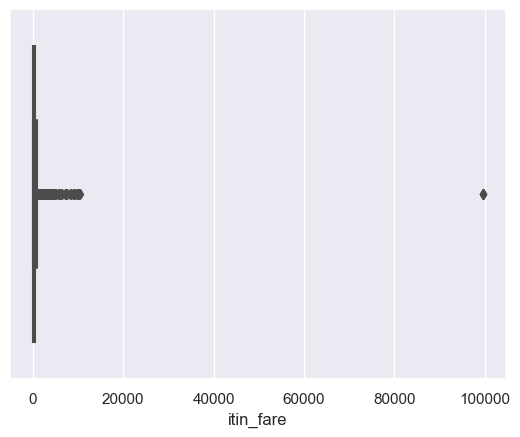

In [615]:
sns.boxplot(x=df["itin_fare"])

In [626]:
df = df[df["itin_fare"] < 10000]

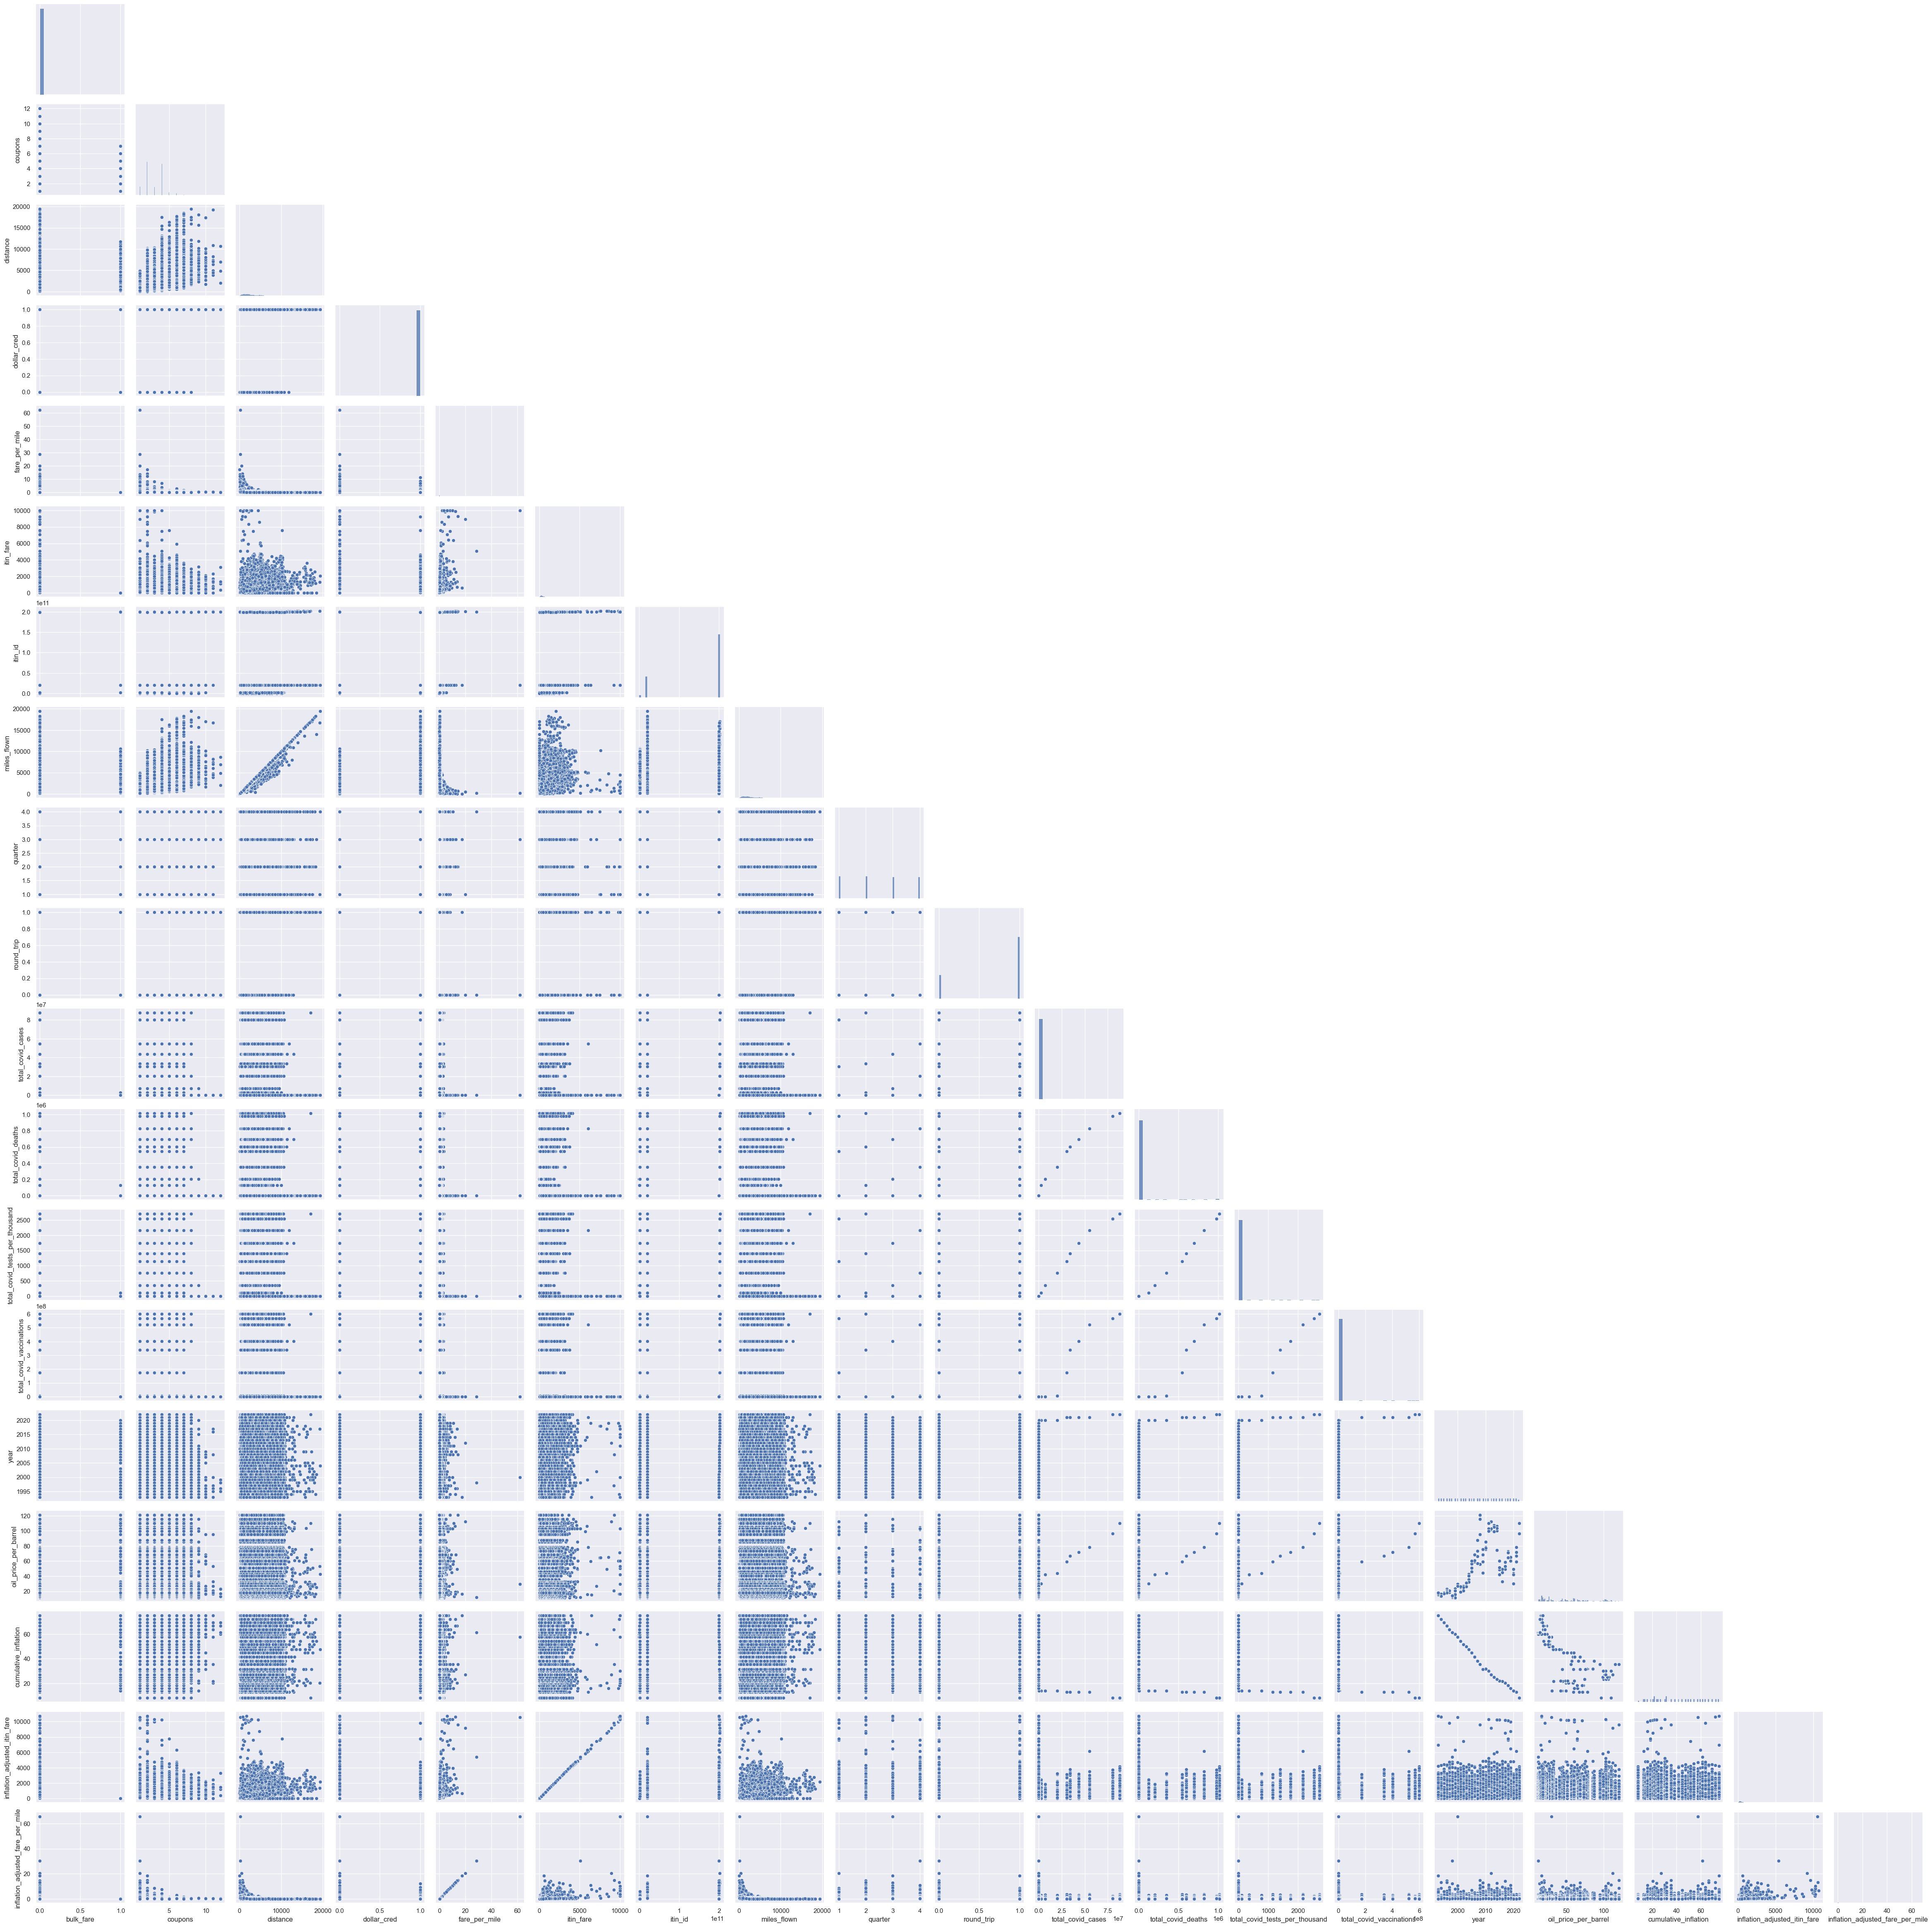

In [631]:
sns.pairplot(df, corner=True)

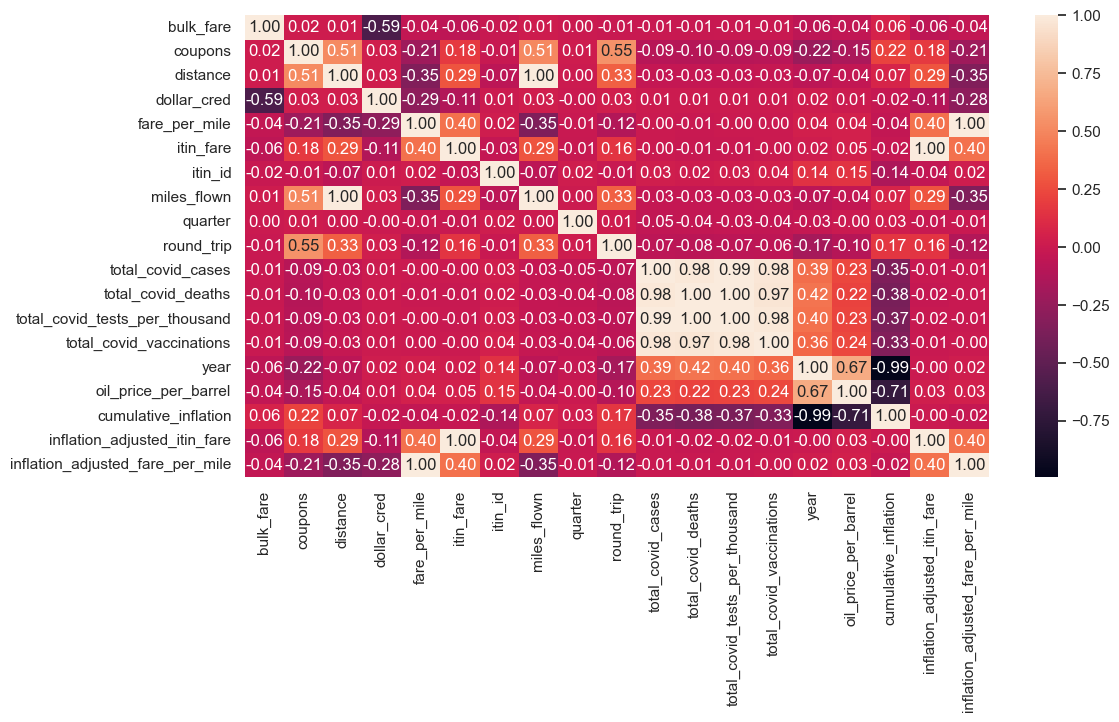

In [634]:
plt.figure(figsize=(12, 6))

sns.heatmap(data=df.corr(), annot=True, fmt="0.2f");

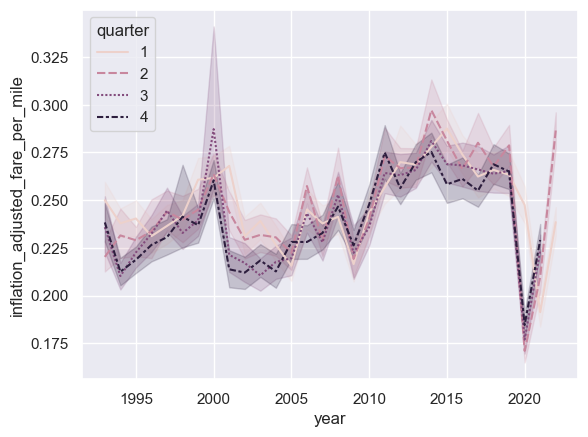

In [646]:
sns.lineplot(data=df, x="year", y="inflation_adjusted_fare_per_mile", style="quarter", hue="quarter");

In [697]:
df_av = df.groupby(["year", "quarter"]).mean().copy()

In [740]:
df_av.drop(columns=["bulk_fare", "coupons", "dollar_cred"], inplace=True)

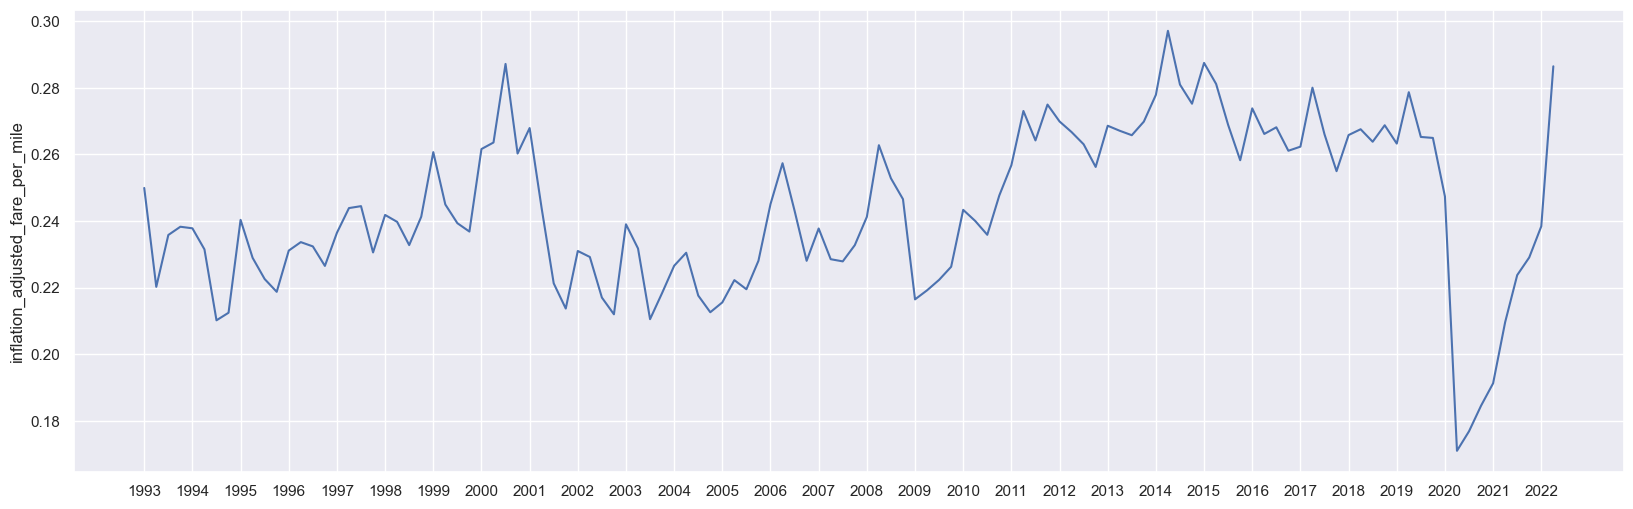

In [736]:
plt.figure(figsize=(20, 6))

plot = sns.lineplot(data=df_av, y="inflation_adjusted_fare_per_mile", x =range(len(df_av)),);
plt.xticks(np.arange(0, len(df_av)+1, 4));
plot.set_xticklabels(["1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]);

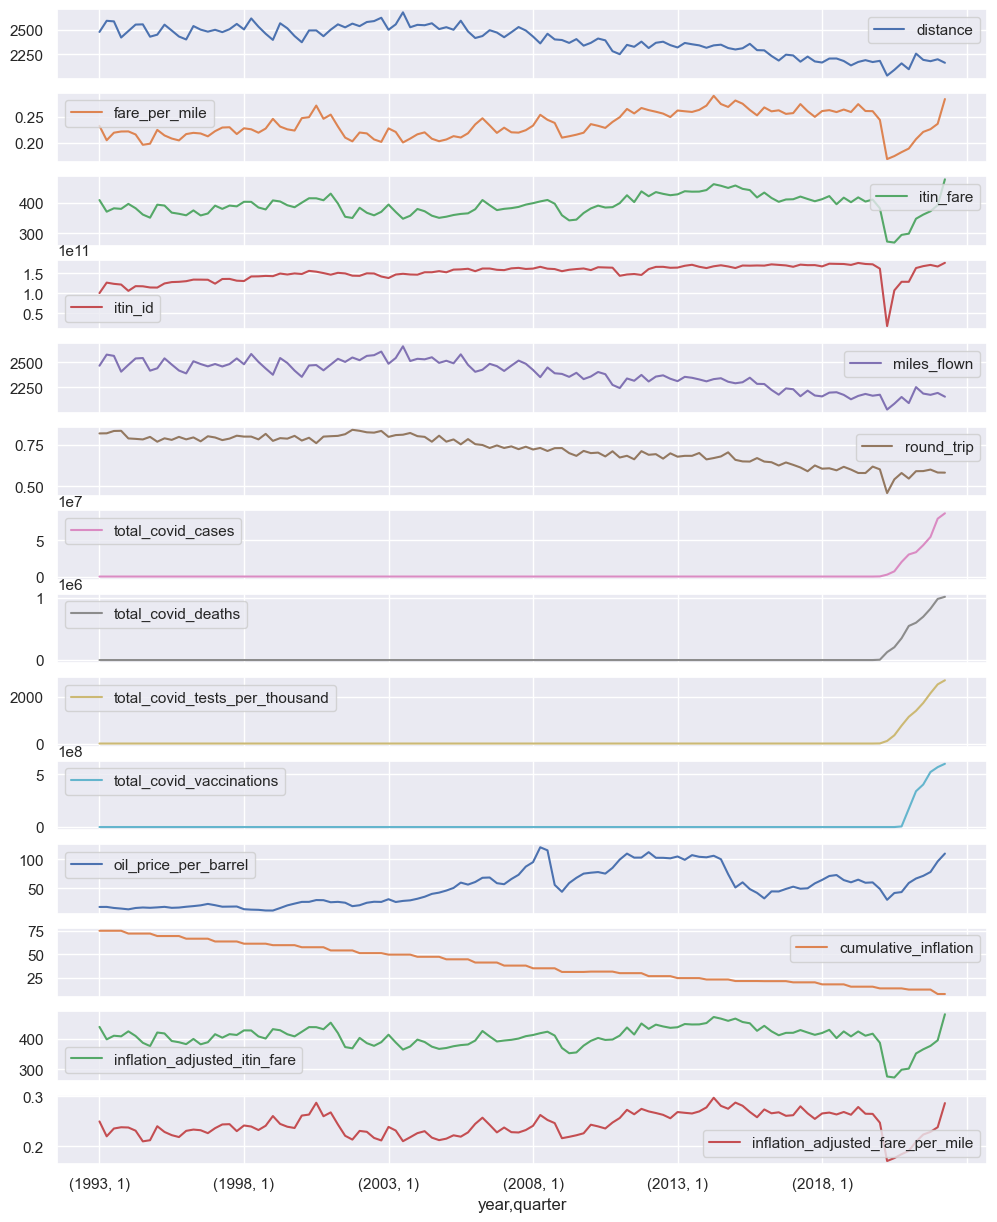

In [741]:
df_av.plot.line(subplots=True, figsize=(12,15))
plt.show()

In [661]:
tester

,bulk_fare,coupons,distance,dollar_cred,fare_per_mile,itin_fare,itin_id,miles_flown,origin,origin_state,...,round_trip,total_covid_cases,total_covid_deaths,total_covid_tests_per_thousand,total_covid_vaccinations,year,oil_price_per_barrel,cumulative_inflation,inflation_adjusted_itin_fare,inflation_adjusted_fare_per_mile
0,0.0,4,1632.0,1,0.1710,279.0,202222093773,1632.0,GNV,FL,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,281.302559,0.172411
1,0.0,2,2017.0,1,0.2960,597.0,202222157297,2017.0,JAX,FL,...,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,601.926981,0.298443
2,0.0,4,2498.0,1,0.1625,406.0,20222179415,2498.0,BDL,CT,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,409.350677,0.163841
3,0.0,2,4950.0,1,0.4034,1997.0,20222577093,4950.0,JFK,NY,...,1.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,2013.481041,0.406729
4,0.0,2,600.0,1,0.2467,148.0,202222109297,600.0,GSP,SC,...,0.0,87692690.0,1017601.0,2708.533,599160144.0,2022,110.103333,8.252900,149.221429,0.248736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353995,0.0,4,2520.0,1,0.1313,331.0,199311641314,2520.0,CMH,OH,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,355.814329,0.141143
353996,0.0,4,995.0,1,0.5038,469.0,19931932590,931.0,CRW,WV,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,504.159881,0.541569
353997,0.0,2,1698.0,1,0.1667,283.0,199311331282,1698.0,LAX,CA,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,304.215877,0.179197
353998,0.0,4,2427.0,1,0.1168,281.0,1993114896,2406.0,BDL,CT,...,1.0,0.0,0.0,0.000,0.0,1993,17.953333,74.967763,302.065941,0.125556


In [643]:
df_piv = df.pivot_table(index = "year", columns ="quarter", values = "inflation_adjusted_fare_per_mile")

In [644]:
df_piv

quarter,1,2,3,4
year,,,,
1993,0.249941,0.220240,0.235818,0.238296
1994,0.237825,0.231499,0.210197,0.212468
1995,0.240366,0.228951,0.222586,0.218749
1996,0.231135,0.233676,0.232391,0.226531
1997,0.236483,0.243900,0.244480,0.230578
1998,0.241838,0.239755,0.232780,0.241302
1999,0.260703,0.244981,0.239364,0.236845
2000,0.261629,0.263594,0.287188,0.260281
2001,0.267937,0.243805,0.221297,0.213725
